In [1]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from collections import OrderedDict

from astropy.cosmology import wCDM

In [2]:
# get correct cosmology

h0 = 70
cosmo = wCDM(H0=h0, Om0=0.3, w0=-1, Ode0=0.7)

xaxis = np.arange(0.001,1.5,0.015)
theor_dist = np.array([cosmo.distmod(z).value for z in xaxis])

In [4]:
# read SALT2mu results
cases_ddf = ['perfect3000', 'random3000', 'fiducial3000', '99SNIa1SNII', '99SNIa1SNIbc', 
         '99SNIa1SNIax', '99.8SNIa0.2SNIa-91bg', '99.1SNIa0.9CART', '99.9SNIa0.1AGN']

colors_ddf = ['black', 'tab:red', 'tab:blue', 'orange', 'brown', 'green', 'purple', 'cyan', 'pink']

data_ddf = {}

for name in cases_ddf:
    fname = '/media/RESSPECT/data/PLAsTiCC/for_metrics/final_data/DDF/v0/fitres/'+ \
            'test_salt2mu_lowz_withbias_' + name + '.fitres'

    data_temp = pd.read_csv(fname, delim_whitespace=True, comment='#')
    
    if 'perfect' not in name:
        fitres_temp = pd.read_csv(fname, delim_whitespace=True, comment='#')
        
        # 11 are Ia and 1 are lowz, different sims
        mask = np.logical_and(fitres_temp['SIM_TYPE_INDEX'].values != 11,
                              fitres_temp['SIM_TYPE_INDEX'].values != 1)
        fitres_temp3 = fitres_temp[mask]

        # remove duplicated redshift
        z_all = []
        for j in range(fitres_temp3.shape[0]):
    
            z = fitres_temp3.iloc[j]['SIM_ZCMB']
            z_new = z
            if z in z_all:
                while z_new in z_all:
                    z_new = z + np.random.normal(loc=0, scale=0.001)
            
            fitres_temp3.loc[j, 'SIM_ZCMB'] = z_new
            z_all.append(z_new)
        
        indx = np.argsort(z_all)
        fitres_temp2 = fitres_temp3[['SIM_ZCMB', 'MU', 'MUERR']].iloc[indx]
        data_ddf[name] = fitres_temp2
    else:
        data_ddf[name] = data_temp

/media/emille/git/COIN/RESSPECT_repo/venv/resspect_main/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [28]:
all_shapes = {'SNIa-91bg': 'o',
              'SNIax': 's',
              'SNII': 'd',
              'SNIbc': 'X',
              'AGN': '^',
              'CART': 'v',
              'TDE': '*',
              'random': '<',
              'fiducial': '>'}

remap_dict_ddf = OrderedDict({
                          'perfect3000': 'Perfect', 
                          'fiducial3000': 'Fiducial', 
                          'random3000': 'Random',
                          '72SNIa28SNII': 'SN-II 28',
                          '75SNIa25SNII': 'SN-II 25', 
                          '90SNIa10SNII': 'SN-II 10',
                          '95SNIa5SNII': 'SN-II 5',
                          '98SNIa2SNII': 'SN-II 2',
                          '99SNIa1SNII': 'SN-II 1',
                          '95SNIa5SNIbc': 'SN-Ibc 5',
                          '98SNIa2SNIbc': 'SN-Ibc 2',
                          '99SNIa1SNIbc': 'SN-Ibc 1',
                          '86SNIa14SNIax': 'SN-Iax 14',
                          '90SNIa10SNIax': 'SN-Iax 10',
                          '95SNIa5SNIax': 'SN-Iax 5',
                          '98SNIa2SNIax': 'SN-Iax 2',
                          '99SNIa1SNIax': 'SN-Iax 1',
                          '99.1SNIa0.9CART': 'CART 0.9',
                          '99.8SNIa0.2SNIa-91bg': 'SN-Ia-91bg 0.2',
                          '99.9SNIa0.1AGN': 'AGN 0.1',
              })

remap_dict_wfd = OrderedDict({
                              'perfect3000': 'Perfect', 
                              'fiducial3000': 'Fiducial', 
                              'random3000': 'Random',
                              '72SNIa28SNII': 'SN-II 28',
                              '75SNIa25SNII': 'SN-II 25', 
                              '90SNIa10SNII': 'SN-II 10',
                              '95SNIa5SNII': 'SN-II 5',
                              '98SNIa2SNII': 'SN-II 2',
                              '99SNIa1SNII': 'SN-II 1',
                              '90SNIa10SNIbc': 'SN-Ibc 10',
                              '95SNIa5SNIbc': 'SN-Ibc 5',
                              '98SNIa2SNIbc': 'SN-Ibc 2',
                              '99SNIa1SNIbc': 'SN-Ibc 1',
                              '75SNIa25SNIax': 'SN-Iax 25',
                              '90SNIa10SNIax': 'SN-Iax 10',
                              '95SNIa5SNIax': 'SN-Iax 5',
                              '98SNIa2SNIax': 'SN-Iax 2',
                              '99SNIa1SNIax': 'SN-Iax 1',
                              '95SNIa5SNIa-91bg': 'SN-Ia-91bg 5',
                              '98SNIa2SNIa-91bg': 'SN-Ia-91bg 2',
                              '99SNIa1SNIa-91bg': 'SN-Ia-91bg 1',
                              '95SNIa5AGN': 'AGN 5',
                              '98SNIa2AGN': 'AGN 2',
                              '99SNIa1AGN': 'AGN 1',
                              '99.6SNIa0.4TDE': 'TDE 0.4',
                              '99.7SNIa0.3CART': 'CART 0.3',
                  })

In [29]:
# read SALT2mu results
cases_wfd = ['perfect3000', 'random3000', 'fiducial3000', '99SNIa1SNII', '99SNIa1SNIbc', 
         '99SNIa1SNIax', '99SNIa1SNIa-91bg', '99.7SNIa0.3CART', '99SNIa1AGN','99.6SNIa0.4TDE']

colors_wfd = ['black', 'tab:red', 'tab:blue', 'orange', 'brown', 'green', 'purple', 'cyan', 'pink', 
         'magenta']

data_wfd = {}

for name in cases_wfd:
    fname = '/media/RESSPECT/data/PLAsTiCC/for_metrics/final_data/WFD/v0/fitres/'+ \
            'test_salt2mu_lowz_withbias_' + name + '.fitres'

    data_temp = pd.read_csv(fname, delim_whitespace=True, comment='#')
    
    if 'perfect' not in name:
        fitres_temp = pd.read_csv(fname, delim_whitespace=True, comment='#')
        
        # 11 are Ia and 1 are lowz, different sims
        mask = np.logical_and(fitres_temp['SIM_TYPE_INDEX'].values != 11,
                              fitres_temp['SIM_TYPE_INDEX'].values != 1)
        fitres_temp3 = fitres_temp[mask]

        # remove duplicated redshift
        z_all = []
        for j in range(fitres_temp3.shape[0]):
    
            z = fitres_temp3.iloc[j]['SIM_ZCMB']
            z_new = z
            if z in z_all:
                while z_new in z_all:
                    z_new = z + np.random.normal(loc=0, scale=0.001)
            
            fitres_temp3.at[j, 'SIM_ZCMB'] = z_new
            z_all.append(z_new)
        
        indx = np.argsort(z_all)
        fitres_temp2 = fitres_temp3[['SIM_ZCMB', 'MU', 'MUERR']].iloc[indx]
        data_wfd[name] = fitres_temp2
    else:
        data_wfd[name] = data_temp


/media/emille/git/COIN/RESSPECT_repo/venv/resspect_main/lib/python3.7/site-packages/pandas/core/frame.py:3041: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc[index, col] = value


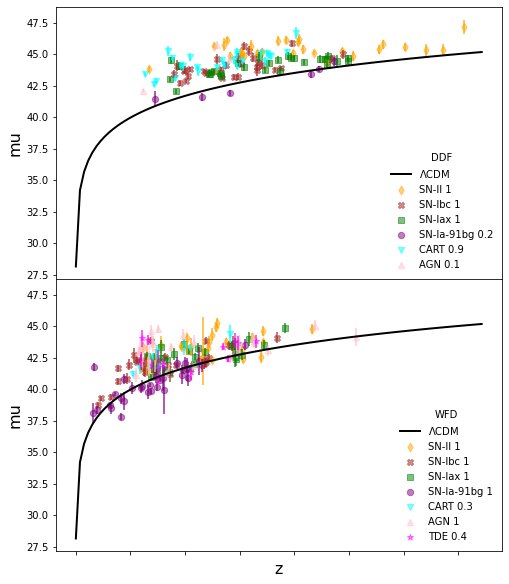

In [30]:
plt.figure(figsize=(8,10))
           
ax1 = plt.subplot(2,1,1)
plt.plot(xaxis, theor_dist, lw=2, color='black', label=r'$\Lambda$CDM')

for i in range(3, len(cases_ddf)):
    for key in all_shapes:
        if key in cases_ddf[i]:
            cont = key
            
    plt.scatter(data_ddf[cases_ddf[i]]['SIM_ZCMB'], data_ddf[cases_ddf[i]]['MU'],
                marker=all_shapes[cont], s=40, 
                 color=colors_ddf[i], label=remap_dict_ddf[cases_ddf[i]], alpha=0.5)
    
    plt.errorbar(data_ddf[cases_ddf[i]]['SIM_ZCMB'], data_ddf[cases_ddf[i]]['MU'], 
                 yerr=data_ddf[cases_ddf[i]]['MUERR'], fmt=' ',
                 color=colors_ddf[i],  alpha=0.85)

#plt.xlabel('z', fontsize=16)
plt.ylabel('mu', fontsize=16)
plt.legend(loc='lower right', title='DDF', frameon=False)
plt.xticks(ax1.get_xticks(), [])

ax2 = plt.subplot(2,1,2, sharex=ax1, sharey=ax1)
plt.plot(xaxis, theor_dist, lw=2, color='black', label=r'$\Lambda$CDM')

for i in range(3, len(cases_wfd)):
    for key in all_shapes:
        if key in cases_wfd[i]:
            cont = key
            
    plt.scatter(data_wfd[cases_wfd[i]]['SIM_ZCMB'], data_wfd[cases_wfd[i]]['MU'],
                marker=all_shapes[cont], s=40, 
                 color=colors_wfd[i], label=remap_dict_wfd[cases_wfd[i]], alpha=0.5)
    
    plt.errorbar(data_wfd[cases_wfd[i]]['SIM_ZCMB'], data_wfd[cases_wfd[i]]['MU'], 
                 yerr=data_wfd[cases_wfd[i]]['MUERR'], fmt=' ',
                 color=colors_wfd[i],  alpha=0.85)

plt.xlabel('z', fontsize=16)
plt.ylabel('mu', fontsize=16)
plt.legend(loc='lower right', title='WFD', frameon=False)

plt.subplots_adjust(hspace=0.001)

plt.show()